# Grover's Algorithm

## Searching Among 8 Elements

### Introduction

Searching among 8 elements is an extension of the searching among 4 elements that we previously saw. Here we have created a custom Cz gate that is used for inverting. As for any Grover's algorithm here it is then passed through an Oracle and then through an Amplifier. The below diagram can be referred to get a clear understanding of how the Circuit is created.


### Circuit diagram


<img src="images/search8.jpg" alt="drawing" width="700"/>

## Code

### Importing Libraries

In [4]:
import boto3
from braket.circuits import Circuit
from braket.aws import AwsDevice
import matplotlib.pyplot as plt
from braket.devices import LocalSimulator
import numpy as np

In [5]:
# Connnecting with the aws account id and initialising the device
aws_account_id = boto3.client("sts").get_caller_identity()["Account"]
device = LocalSimulator()
s3_folder = (f"amazon-braket-1c440ad1b4a7","Simulator")

## Implementing Search on a Classical System

In [2]:
elements = [1,2,3,4,5,6,7,8]


to_find=8
i=0
flag=0
for i in range(len(elements)): 
    if(to_find == elements[i]):
        flag=1
        break

if( flag == 0 ):
    print('Element Not Found')
else:
    print('Element Found At Index',i)

Element Found At Index 7


## Implementing Search on a Quantum System

In [4]:
to_find='001'

### Oracle Operator

In [5]:
temp=[]

for i in range(8):
    temp.append([])
    for j in range(8):
        
        if(i == j):
            if(i == 7):
                temp[i].append(-1.0)
            else:
                temp[i].append(1.0)
        else:
            temp[i].append(0.0)

            
cz_matrix=np.array(temp)

grover = Circuit()
grover.h([0,1,2])

cz_gate = Circuit().unitary(matrix=cz_matrix, targets=[0,1,2])

oracle = Circuit()

if (to_find == '000'):
    oracle.x([0,1,2]).add(cz_gate).x([0,1,2])
    
elif (to_find == '001'):
    oracle.x([0,1]).add(cz_gate).x([0,1])
    
elif (to_find == '010'):
    oracle.x([0,2]).add(cz_gate).x([0,2])
    
elif (to_find == '011'):
    oracle.x([0]).add(cz_gate).x([0])
    
elif (to_find == '100'):
    oracle.x([1,2]).add(cz_gate).x([1,2])
    
elif (to_find == '101'):
    oracle.x([1]).add(cz_gate).x([1])
    
elif (to_find == '110'):
    oracle.x([2]).add(cz_gate).x([2])
    
elif (to_find == '111'):
    oracle.add(cz_gate)


print('The Grover Initial Part is')
print(grover,'\n\n')

print('The Oracle Initial Part is')
print(oracle)

The Grover Initial Part is
T  : |0|
        
q0 : -H-
        
q1 : -H-
        
q2 : -H-

T  : |0| 


The Oracle Initial Part is
T  : |0|1|2|
            
q0 : -X-U-X-
        |   
q1 : -X-U-X-
        |   
q2 : ---U---

T  : |0|1|2|


### Adding the Amplification Operator To the Circuit

In [6]:
amplify = Circuit()

amplify.h([0,1,2])
amplify.x([0,1,2]).unitary(matrix=cz_matrix, targets=[0,1,2]).x([0,1,2])
amplify.h([0,1,2])

print('The Amplification Initial Part is')
print(amplify)

The Amplification Initial Part is
T  : |0|1|2|3|4|
                
q0 : -H-X-U-X-H-
          |     
q1 : -H-X-U-X-H-
          |     
q2 : -H-X-U-X-H-

T  : |0|1|2|3|4|


### Combine Circuit Components

In [7]:
grover.add(oracle)
grover.add(amplify)

print(grover)

T  : |0|1|2|3|4|5|6|7|8|
                        
q0 : -H-X-U-X-H-X-U-X-H-
          |       |     
q1 : -H-X-U-X-H-X-U-X-H-
          |       |     
q2 : -H---U-H-X---U-X-H-

T  : |0|1|2|3|4|5|6|7|8|


## Run the Circuit To Verify

In [8]:
counts = device.run(grover, shots = 1000).result().measurement_counts
print(counts)

Counter({'001': 782, '111': 39, '101': 38, '100': 38, '011': 28, '010': 27, '000': 27, '110': 21})


## Plotting Results


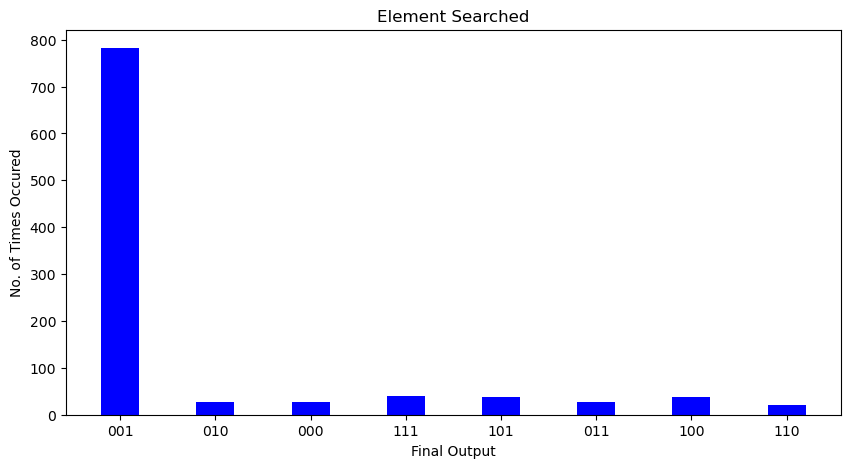

In [11]:
solutions=[]
total_times=[]

for key, value in counts.items():
    if(key[:4] not in solutions):
        solutions.append(key[:4])
        total_times.append(0)
    total_times[solutions.index(key[:4])] += value
    
    

  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(solutions, total_times, color ='blue', width = 0.4)
 
plt.xlabel("Final Output")
plt.ylabel("No. of Times Occured")
plt.title("Element Searched")
plt.show()

#### Sometimes Value may come wrong due to the noise. Do run the algorithm  again to find the correct output.

#### Hence from the above graph we can conclude that the state with higher number of occurrence is same as the state that we searched for.